In [1]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn

In [2]:
X = pd.read_csv("inputs.csv",header=None)
y = pd.read_csv("output.csv",header=None)

print(len(X))
print(len(y))

242
242


In [3]:
X.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1.78,0.13,9.29,26.97,43.71,0.48,0.59,50.43,77.52,2.47,32.65
1,7.80,0.17,3.35,27.33,43.56,0.63,1.47,57.64,75.95,7.75,38.67
2,5.23,1.04,8.60,31.33,46.34,0.33,1.03,50.90,85.12,6.17,35.08
3,9.35,0.78,7.80,33.37,45.79,0.51,1.03,54.33,84.74,20.62,38.03
4,4.21,1.91,2.93,28.09,42.75,0.58,1.46,58.28,77.00,2.60,39.18


In [4]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [25]:
print(len(X_train))
print(len(y_train))

169
169


In [26]:
# Convert data to tensor

X_train = torch.FloatTensor(X_train.to_numpy())
X_test  = torch.FloatTensor(X_test.to_numpy())
y_train = torch.FloatTensor(y_train.to_numpy())
y_test = torch.FloatTensor(y_test.to_numpy())

In [10]:
X_train[0:5,:]

tensor([[ 3.9400,  1.6200,  1.9100, 35.3500, 37.2600,  0.7400,  1.8000, 52.0300,
         83.3500, 10.8300, 25.2500],
        [ 9.5300,  1.0900,  2.3600, 32.9200, 43.9800,  0.4700,  1.4900, 53.2300,
         82.8900,  4.7500, 24.5900],
        [ 1.8600,  0.5800,  8.0200, 24.4100, 43.9000,  0.7700,  0.8900, 52.4700,
         82.8500, 16.8800, 25.6500],
        [ 3.4400,  1.4600,  3.8100, 32.3300, 45.5400,  0.4900,  2.0900, 56.5600,
         77.2600, 14.3700, 44.3500],
        [ 9.6000,  0.7600,  3.8200, 21.4200, 45.2900,  0.4400,  0.5900, 58.2000,
         85.5900, 16.4800, 29.4900]])

In [11]:
y_train[0:5,:]

tensor([[69.0100],
        [50.4200],
        [95.7700],
        [54.6100],
        [93.9200]])

In [12]:
class NN(nn.Module):
    def __init__(self, in_size, h1=10,h2=10, out_size=1):
        super().__init__()

        self.bnorm = nn.BatchNorm1d(in_size)
        self.fc1 = nn.Linear(in_size,h1)
        self.sigmoid = nn.Sigmoid()
        self.fc2 = nn.Linear(h1,h2)
        self.out = nn.Linear(h2,out_size)

    def forward(self,x):
        x = self.bnorm(x)
        x = self.fc1(x)
        x = self.sigmoid(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        x = self.out(x)

        return x

In [13]:
model = NN(in_size = X.shape[1]) # Construct the Neural Network
criterion = nn.MSELoss() # Loss function is Mean Squared Error
optimizer = torch.optim.Adam(model.parameters(), lr=0.01) # Use Adam optimizer

Train the network

In [14]:
import time

In [15]:
epochs = 5000
losses = []
lambda1 = 0.1

print("Training starts...")
start_time = time.time()
for epoch in range(epochs):
    y_preds = model.forward(X_train)
    
    # RMSE loss
    loss = torch.sqrt(criterion(y_preds,y_train)) 

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())

    if epoch%100 == 0:
        print(f"Epoch {epoch}/{epochs} | Loss {loss}")

elapsed_time = time.time() - start_time
print(f"Training finished. Elapsed time: {elapsed_time} sec")

Training starts...
Epoch 0/5000 | Loss 59.133026123046875
Epoch 100/5000 | Loss 47.97975158691406
Epoch 200/5000 | Loss 36.20389938354492
Epoch 300/5000 | Loss 26.152973175048828
Epoch 400/5000 | Loss 18.31785011291504
Epoch 500/5000 | Loss 14.3616943359375
Epoch 600/5000 | Loss 13.496545791625977
Epoch 700/5000 | Loss 13.40883731842041
Epoch 800/5000 | Loss 13.403203010559082
Epoch 900/5000 | Loss 13.402898788452148
Epoch 1000/5000 | Loss 13.36674690246582
Epoch 1100/5000 | Loss 7.738314151763916
Epoch 1200/5000 | Loss 5.196625709533691
Epoch 1300/5000 | Loss 3.483814239501953
Epoch 1400/5000 | Loss 2.169156074523926
Epoch 1500/5000 | Loss 1.3419339656829834
Epoch 1600/5000 | Loss 1.0012972354888916
Epoch 1700/5000 | Loss 0.8296281099319458
Epoch 1800/5000 | Loss 0.7231537699699402
Epoch 1900/5000 | Loss 0.6407939195632935
Epoch 2000/5000 | Loss 0.5951156616210938
Epoch 2100/5000 | Loss 0.5700163245201111
Epoch 2200/5000 | Loss 0.5516536235809326
Epoch 2300/5000 | Loss 0.5443820953369

Test the trained neural network

In [19]:
with torch.no_grad():
    y_test_preds = model.forward(X_test)
    y_reals = y_test

print("Neural Network Test Results")

loss = torch.sqrt(criterion(y_reals,y_test_preds))
for i in range(len(y_test_preds)):
    print(f"({i+1}) Actual Value: {y_reals[i].item():.3f} | \
Predicted Value = {y_test_preds[i].item():.3f}")

print(f"RMSE over the test data set: {loss:.3f} | \
Test data number: {len(y_test)}")

Neural Network Test Results
(1) Actual Value: 66.830 | Predicted Value = 60.684
(2) Actual Value: 103.500 | Predicted Value = 97.766
(3) Actual Value: 55.470 | Predicted Value = 52.430
(4) Actual Value: 100.970 | Predicted Value = 94.385
(5) Actual Value: 47.470 | Predicted Value = 43.933
(6) Actual Value: 99.210 | Predicted Value = 96.115
(7) Actual Value: 67.240 | Predicted Value = 68.933
(8) Actual Value: 59.760 | Predicted Value = 57.321
(9) Actual Value: 65.480 | Predicted Value = 65.037
(10) Actual Value: 39.890 | Predicted Value = 43.359
(11) Actual Value: 41.970 | Predicted Value = 42.601
(12) Actual Value: 55.550 | Predicted Value = 51.762
(13) Actual Value: 42.120 | Predicted Value = 43.059
(14) Actual Value: 58.940 | Predicted Value = 56.166
(15) Actual Value: 66.820 | Predicted Value = 64.013
(16) Actual Value: 54.670 | Predicted Value = 54.049
(17) Actual Value: 67.140 | Predicted Value = 56.705
(18) Actual Value: 56.610 | Predicted Value = 53.256
(19) Actual Value: 55.570

Use genetic algorithm to find the minimum over Neural Network

In [20]:
from geneticalgorithm import geneticalgorithm as ga

In [21]:
def f(X): # define the cost function as the output of the neural network
    model.eval()
    X = torch.FloatTensor(X)
    return float(model.forward(X.view(1,-1)).item())

 The best solution found:                                                                           
 [ 9.74271948  0.15009312  9.8180474  35.6460731  40.06893402  0.77572272
  0.51591646 50.52436649 75.1047489   1.18817543 49.42350783]

 Objective function:
 42.53559875488281


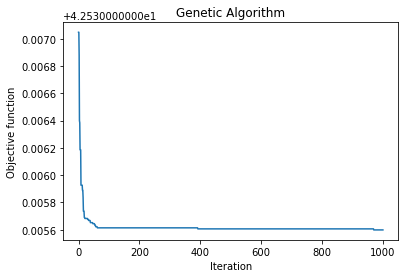

In [27]:
# Input dimension (input feature number)
dim = X.shape[1]

# Boundaries
varbound=np.array([[1,10],[0,2],[1,10],[21,36],[37,47],[0.3,0.8],
        [0.5,2.5],[50,60],[75,86],[1,21],[24,50]])

algorithm_param = {'max_num_iteration': 1000,\
                   'population_size':100,\
                   'mutation_probability':0.15,\
                   'elit_ratio': 0.05,\
                   'crossover_probability': 0.5,\
                   'parents_portion': 0.3,\
                   'crossover_type':'uniform',\
                   'max_iteration_without_improv':None}

ga_model=ga(function=f,
        dimension=dim,variable_type='real',
        variable_boundaries=varbound,
        algorithm_parameters=algorithm_param)

# Call genetic algorithm
ga_model.run()

In [80]:
print(f"Minimum y value in the dataset: {y.min().item()}")

Minimum y value in the dataset: 39.78
